# 記述統計

In [6]:
# ライブラリのインストール
from matplotlib.pyplot import plot as plot
import numpy as np
import seaborn as sns

In [3]:
# 使用するデータのロード
df = sns.load_dataset("tips")
df["tip_rate"] = df["tip"] / df["total_bill"]  ## 支払に対するチップの割合
df

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


## 分布
* どの値にどのくらいデータが存在するか
  * 連続変数の場合は、ヒストグラムを使う
  * カテゴリ変数の場合は、棒グラフを使う

### ヒストグラム
sns.displot()

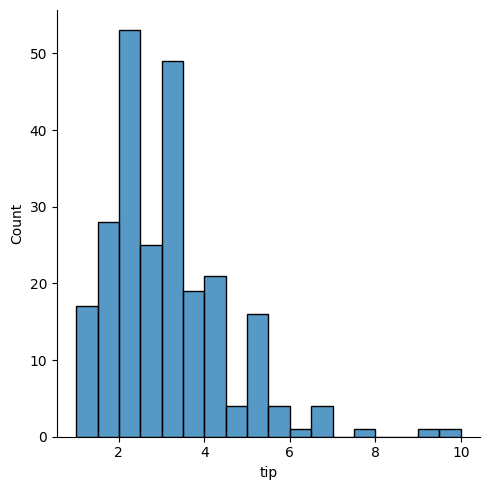

In [4]:
sns.displot(df["tip"])

### 棒グラフ
sns.catplot(x, data, kind="count")

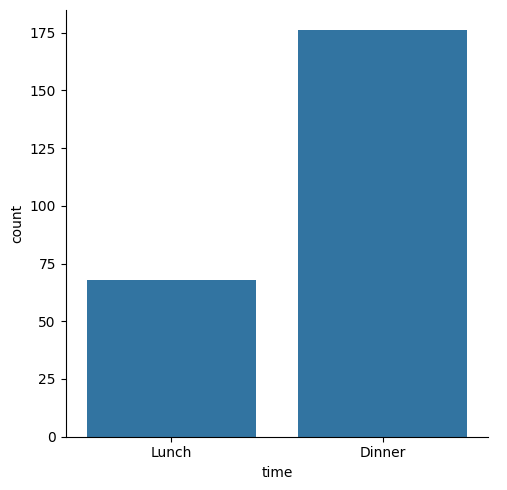

In [5]:
sns.catplot(x="time", data=df, kind="count")

## 代表値
* 平均(mean)
* 中央値(median)
* 最頻値(mode)
* 範囲(range)
* 四分位数(quartile)
* 平均偏差(MD)
* 分散(variance)
* 標準偏差(standard deviation)

### 平均値
* 平均値の特徴
  * **平均からの差(偏差(deviation))の合計は0**
  * **平均値は、各値からの差の2乗の合計(平方和)を最小にする**
* 平均値の算出
  * np.mean()
  * df["column"].mean()
  * df.groupby("column").mean()

In [7]:
# 平均値
np.mean(df["tip_rate"])

0.16080258172250472

In [8]:
df["tip_rate"].mean()

0.16080258172250472

In [16]:
df.groupby("sex").mean(numeric_only=True)

/var/folders/q5/s5mcbmt95hd29sp3b9xmr2580000gn/T/ipykernel_549/2199818090.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sex").mean(numeric_only=True)


,total_bill,tip,size,tip_rate
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


/var/folders/q5/s5mcbmt95hd29sp3b9xmr2580000gn/T/ipykernel_549/3213116755.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="sex", y="tip_rate", data=df, ci=None)  ## ci: credible interval(信頼区間)


<Axes: xlabel='sex', ylabel='tip_rate'>

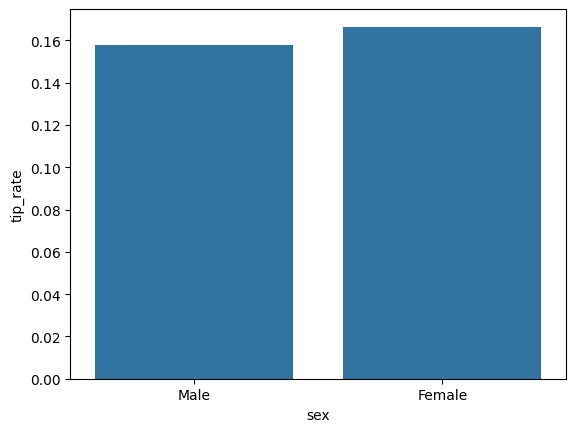

In [18]:
sns.barplot(x="sex", y="tip_rate", data=df, ci=None)  ## ci: credible interval(信頼区間)

## 2変数間の記述統計

### 共分散(covariance)

### 正の相関と負の相関

### 相関係数(correlation coefficient)

### 連関(association)

### カイ二乗

### クラメールの連関係数